<a href="https://colab.research.google.com/github/Pavel184/Neural_networks/blob/Homework_lesson_7/Homework_lesson_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework_lesson_1

**1** Сделайте краткий обзор какой-нибудь научной работы посвященной тому или иному алгоритму для object detection, который не рассматривался на уроке. Проведите анализ: Чем отличается выбранная вами на рассмотрение архитектура нейронной сети от других архитектур? В чем плюсы и минусы данной архитектуры? Какие могут возникнуть трудности при применении данной архитектуры на практике?


HOG
Основная идея состоит в том, что внешний вид и форму локального объекта часто можно довольно хорошо охарактеризовать с помощью распределения локальных градиентов интенсивности или направлений краев, даже без точного знания соответствующего градиента или положения краев. На практике это реализуется путем разделения окна изображения на небольшие пространственные области («ячейки»), для каждой ячейки накапливается локальная одномерная гистограмма направлений градиента или ориентации краев по пикселям ячейки. Объединенные записи гистограммы образуют
представление. Для лучшей инвариантности к освещению, затенению и т. Д. Также полезно нормализовать по контрасту локальные ответы перед их использованием. Это можно сделать, накапливая меру локальной «энергии» гистограммы по несколько большим пространственным областям («блокам») и используя результаты для нормализации всех ячеек в блоке.
Мы будем называть нормализованные блоки дескрипторов дескрипторами гистограммы ориентированного градиента (HOG). Разделение окна обнаружения плотной (фактически перекрывающейся) сеткой дескрипторов HOG и использование комбинированного вектора признаков в обычном оконном классификаторе на основе SVM дает нашу цепочку обнаружения человека

Модель RetinaNet
RetinaNet построен с использованием трех факторов, а именно модели ResNet (в частности, ResNet-101), сети пирамиды функций (FPN) и фокальных потерь. 
Архитектура модели RetinaNet состоит из четырех основных компонентов:

a) Путь снизу вверх - магистральная сеть (например, ResNet), которая вычисляет карты характеристик в разных масштабах, независимо от размера входного изображения или магистрали.
b) Нисходящий путь и боковые соединения - верхний нижний путь увеличивает дискретизацию пространственно более грубых карт признаков с более высоких уровней пирамиды, а боковые соединения объединяют нисходящие слои и слои снизу вверх с одинаковым пространственным размером.
c) Подсеть классификации - предсказывает вероятность присутствия объекта в каждом пространственном местоположении для каждого якорного блока и класса объекта.
d) Подсеть регрессии - регрессирует смещение ограничивающих прямоугольников от якорных ящиков для каждого наземного объекта.

Focal Loss (FL) является усовершенствованием по сравнению с Cross-Entropy Loss (CE) и вводится для решения проблемы дисбаланса классов с одноступенчатыми моделями обнаружения объектов.

Приложение высокого уровня RetinaNet используется для обнаружения объектов на аэрофотоснимках и спутниковых снимках.

Плюсы:
- one shot модель
- относительная быстрота

Минусы:
- Недостаточно быстро для reail time обработки

**2** Запустите детектор (ssdMobile_v2 или faster_rcnn, или любой другой детектор) для своей картинки и попробуйте найти 10 объектов, 100 объектов.

In [91]:
#Импорт всего

# Currently %tensorflow_version 2.x installs beta1, which doesn't work here.
# %tensorflow_version can likely be used after 2.0rc0  
#!pip install tf-nightly-gpu-2.0-preview
#!pip install tf-nightly-gpu-2.0-preview
from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow

import tensorflow as tf

# For running inference on the TF-Hub module.
import tensorflow as tf

import tensorflow_hub as hub

# For downloading the image.
import matplotlib.pyplot as plt
import tempfile
from six.moves.urllib.request import urlopen
from six import BytesIO

# For drawing onto the image.
import numpy as np
from PIL import Image
from PIL import ImageColor
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageOps

# For measuring the inference time.
import time
%matplotlib inline

# Check available GPU devices.
print("The following GPU devices are available: %s" % tf.test.gpu_device_name())

The following GPU devices are available: /device:GPU:0


In [92]:
from google.colab import files

In [93]:
import cv2 as cv


Загрузим картинку

In [94]:
#files.upload()

## OpenCV - Selectiv Search

https://www.pyimagesearch.com/2020/06/29/opencv-selective-search-for-object-detection/

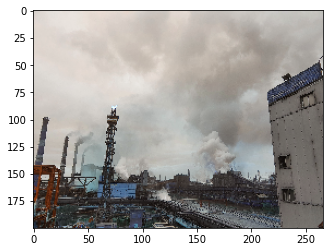

In [185]:
#Читаем картинку
im = cv.imread('/content/pict.png')
    
# размеры изображения
newH = 200  #высота
newW = int(im.shape[1]*200/im.shape[0]) # ширина 
#сжатая картинка
im = cv.resize(im, (newW, newH)) 
#Выводим 

plt.imshow(im)
plt.show()

Selective Search(селективный поиск)

In [186]:
#Настройка модели
cv.setUseOptimized(True) #режим оптимизации
cv.setNumThreads(6)      #количество потоков

In [187]:
# Объект Selective Search Segmentation
sss = cv.ximgproc.segmentation.createSelectiveSearchSegmentation()

# запускаем с картинкой
sss.setBaseImage(im)
  
# Выбираем точный метод 
sss.switchToSelectiveSearchQuality()

# Делаем selective search segmentation 
rects = sss.process() 
#вернёт массив прямоугольников, гдевозможно что-то есть
print(rects.shape) #число найденых объектов

(1367, 4)


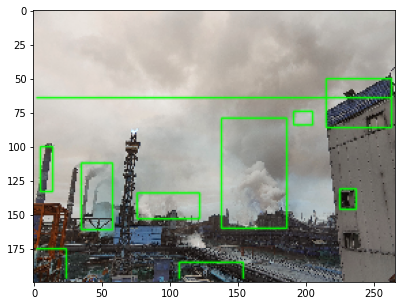

In [188]:
#Построим области

num_Rects = 10 #число выводимых region proposals (прямоугольников)

#создаем копию исходной картинки
im_ = im.copy()

for i, rect in enumerate(rects): 
  if (i < num_Rects): #пока не больше 
    # x,y - координаты левого верхнего угла; w, h - ширина и высота области
    x, y, w, h = rect
    # рисуем рамку      
    cv.rectangle(im_, (x, y), (x+w, y+h), (0, 255, 0), 1, cv.LINE_AA) 
  else: 
    break 

# Рисуем на экран
plt.figure(figsize=(16,5))
plt.imshow(im_) 
plt.show()

https://github.com/opencv/opencv/tree/master/data/haarcascades

Запишем маршрут, где есть что-нибудь для чтения (последовательность из нескольких фотографий )



In [99]:
#files.upload()

In [100]:
root_path = './' #change dir to your project folder 

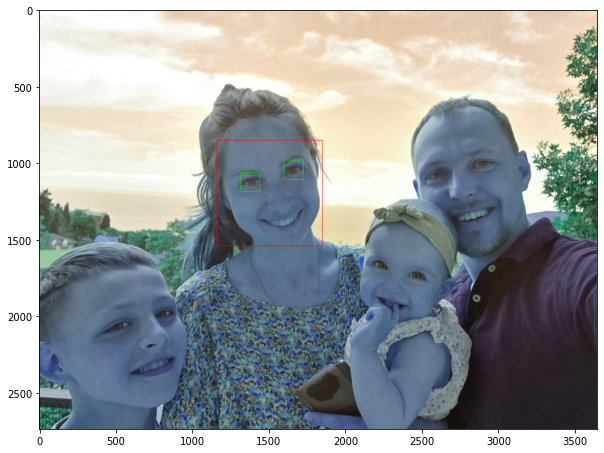

In [101]:
imf = cv.imread('/content/20210601_114535.jpg')

#https://github.com/Itseez/opencv/blob/master/data/haarcascades/haarcascade_frontalface_default.xml
#face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
#https://github.com/Itseez/opencv/blob/master/data/haarcascades/haarcascade_eye.xml
#eye_cascade = cv.CascadeClassifier('haarcascade_eye.xml')
face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_eye.xml')

gray = cv.cvtColor(imf, cv.COLOR_RGB2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)


for (x,y,w,h) in faces:
     cv.rectangle(imf,(x,y),(x+w,y+h),(255,0,0),2)
     roi_gray = gray[y:y+h, x:x+w]
     roi_color = imf[y:y+h, x:x+w]

     eyes = eye_cascade.detectMultiScale(roi_gray)
     for (ex,ey,ew,eh) in eyes:
         cv.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
plt.figure(figsize=(10,10))
plt.imshow(imf)      
plt.show()   

## **Формирование и обработка результатов детектирования**


Запишем основные функции из примера TensorFlow (https://github.com/tensorflow/hub/blob/master/examples/colab/object_detection.ipynb) и адаптируем их для своих целей

In [102]:
# выводит картинку
def display_image(image):
  fig = plt.figure(figsize=(20, 15))
  plt.grid(False)
  plt.imshow(image)

#  Грузим и обрабатываем картинку
def download_and_resize_image(url, new_width=256, new_height=256,
                              display=False):
  _, filename = tempfile.mkstemp(suffix=".jpg")
  response = urlopen(url)
  image_data = response.read()
  #read image
  image_data = BytesIO(image_data)
  pil_image = Image.open(image_data)
  pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.ANTIALIAS)
  pil_image_rgb = pil_image.convert("RGB")
  pil_image_rgb.save(filename, format="JPEG", quality=90)
  #print("Image downloaded to %s." % filename)
  if display:
    display_image(pil_image)
  return filename

#  Рисуем рамку на изображении
def draw_bounding_box_on_image(image,
                               ymin,
                               xmin,
                               ymax,
                               xmax,
                               color,
                               font,
                               thickness=4,
                               display_str_list=()):
  """Adds a bounding box to an image."""
  draw = ImageDraw.Draw(image)
  im_width, im_height = image.size
  (left, right, top, bottom) = (xmin * im_width, xmax * im_width,
                                ymin * im_height, ymax * im_height)
  draw.line([(left, top), (left, bottom), (right, bottom), (right, top),
             (left, top)],
            width=thickness,
            fill=color)

  # If the total height of the display strings added to the top of the bounding
  # box exceeds the top of the image, stack the strings below the bounding box
  # instead of above.
  display_str_heights = [font.getsize(ds)[1] for ds in display_str_list]
  # Each display_str has a top and bottom margin of 0.05x.
  total_display_str_height = (1 + 2 * 0.05) * sum(display_str_heights)

  if top > total_display_str_height:
    text_bottom = top
  else:
    text_bottom = bottom + total_display_str_height
  # Reverse list and print from bottom to top.
  for display_str in display_str_list[::-1]:
    text_width, text_height = font.getsize(display_str)
    margin = np.ceil(0.05 * text_height)
    draw.rectangle([(left, text_bottom - text_height - 2 * margin),
                    (left + text_width, text_bottom)],
                   fill=color)
    draw.text((left + margin, text_bottom - text_height - margin),
              display_str,
              fill="black",
              font=font)
    text_bottom -= text_height - 2 * margin

#  Рисуем все рамки
# max_boxes - максимальное число объектов для отображения, min_score=0.01 - минимакльная точность их детекции
# можно менять

def draw_boxes(image, boxes, class_names, scores, max_boxes=3, min_score=0.01):
  """Overlay labeled boxes on an image with formatted scores and label names."""
  colors = list(ImageColor.colormap.values())

  try:
    font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf",
                              25)
  except IOError:
    print("Font not found, using default font.")
    font = ImageFont.load_default()

  for i in range(min(boxes.shape[0], max_boxes)):
    if scores[i] >= min_score:
      ymin, xmin, ymax, xmax = tuple(boxes[i])
      display_str = "{}: {}%".format(class_names[i].decode("ascii"),
                                     int(100 * scores[i]))
      color = colors[hash(class_names[i]) % len(colors)]
      image_pil = Image.fromarray(np.uint8(image)).convert("RGB")
      draw_bounding_box_on_image(
          image_pil,
          ymin,
          xmin,
          ymax,
          xmax,
          color,
          font,
          display_str_list=[display_str])
      np.copyto(image, np.array(image_pil))
  return image

Загрузка детектора

In [103]:
module_handle = "https://tfhub.dev/google/openimages_v4/ssd/mobilenet_v2/1" #@param ["https://tfhub.dev/google/openimages_v4/ssd/mobilenet_v2/1", "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"]

detector = hub.load(module_handle).signatures['default']

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


# Формируем тензор

In [158]:
def load_img(path):
  img = tf.io.read_file(path)
  img = tf.image.decode_jpeg(img, channels=3)
  return img

Выполняем детектор

In [159]:

def run_detector(detector, path):
  img = load_img(path)

  converted_img  = tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]
  start_time = time.time()
  result = detector(converted_img)
  end_time = time.time()
  #print(result['detection_scores'])
  result = {key:value.numpy() for key,value in result.items()} 

  image_with_boxes = draw_boxes(
      img.numpy(), result["detection_boxes"],
      result["detection_class_entities"], result["detection_scores"], max_boxes=20)

  display_image(image_with_boxes)
  return result

Возвращаем рамки для объектов

In [160]:
#  Найдем рамку
# max_boxes - максимальное число объектов для отображения, min_score=0.0 - минимакльная точность их детекции
# можно менять
def get_bounding_box_on_image(image, boxes, class_names, scores, max_boxes=100, min_score=0.1):
  """Overlay labeled boxes on an image with formatted scores and label names."""
  if len(image.shape)>3:
    image=image.reshape(image.shape[-3],image.shape[-2],image.shape[-1])
  I_shape=np.uint8(image).shape
  #print(I_shape)
  im_array=[]
  for i in range(min(boxes.shape[0], max_boxes)): 
    #print(tuple(boxes[i]))
    if scores[i] >= min_score:
      ymin, xmin, ymax, xmax = tuple(boxes[i])


      yminI = np.int(ymin*I_shape[0])
      ymaxI = np.int(ymax*I_shape[0])
      xminI = np.int(xmin*I_shape[1])
      xmaxI = np.int(xmax*I_shape[1])
      imf = np.array(image)[yminI:ymaxI,xminI:xmaxI,:]
      #print(imf.shape,imf[0,0,:])
      
      im_array.append(imf.copy())  
  return im_array

In [161]:
#  Вернем рамки
def get_boxes(image, boxes, class_names, scores, max_boxes=100, min_score=0.1):
  """Overlay labeled boxes on an image with formatted scores and label names."""
 
  image_pil = np.array(image)
  for i in range(min(boxes.shape[0], max_boxes)):
    if scores[i] >= min_score:
      ymin, xmin, ymax, xmax = tuple(boxes[i])
      
      imf= get_bounding_box_on_image(image_pil, boxes, class_names, scores, max_boxes=max_boxes, min_score=0.1)
     
  return imf

Чтение имен кадров 

In [162]:
import os, fnmatch
listOfFiles = os.listdir(root_path)
pattern = '*.jpg'
List_name=[]
for entry in listOfFiles:
    if fnmatch.fnmatch(entry, pattern):
            List_name.append(np.array(root_path+entry))
List_name[0]


array('./20210604_151034.jpg', dtype='<U21')

In [163]:
List_name

[array('./20210604_151034.jpg', dtype='<U21'),
 array('./20191117_152229.jpg', dtype='<U21'),
 array('./20210430_143006.jpg', dtype='<U21'),
 array('./20210630_155148.jpg', dtype='<U21'),
 array('./20201222_095617.jpg', dtype='<U21'),
 array('./20210601_114535.jpg', dtype='<U21')]

Проверяем детектор

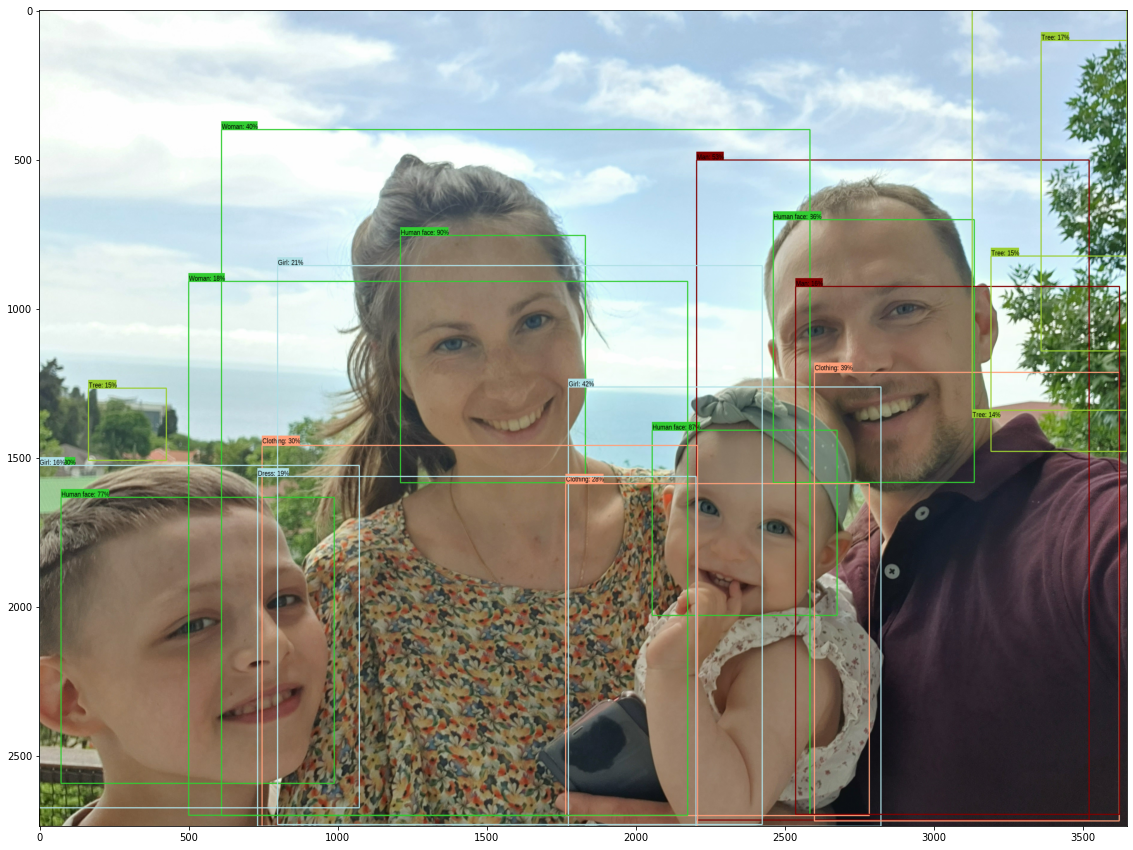

In [164]:
result = run_detector(detector, List_name[5])

In [165]:
result

{'detection_boxes': array([[0.2765097 , 0.3321153 , 0.5792233 , 0.5021992 ],
        [0.5152705 , 0.563505  , 0.7418134 , 0.73357636],
        [0.25724012, 0.6747267 , 0.5787332 , 0.8598945 ],
        [0.5972682 , 0.02005373, 0.94769835, 0.271613  ],
        [0.18410844, 0.604319  , 0.9926072 , 0.96535146],
        [0.46229297, 0.4863898 , 1.        , 0.773937  ],
        [0.14684138, 0.16759309, 0.9868525 , 0.7088617 ],
        [0.44442728, 0.71263784, 0.99370146, 0.99300665],
        [0.53382975, 0.20483549, 1.        , 0.60544926],
        [0.55844396, 0.        , 0.97752184, 0.29459274],
        [0.5804911 , 0.484097  , 0.9871101 , 0.76316535],
        [0.3133668 , 0.21922919, 0.99780774, 0.6649718 ],
        [0.57191217, 0.20072797, 1.        , 0.60401046],
        [0.33295298, 0.13760343, 0.98664546, 0.59631455],
        [0.03763886, 0.9208798 , 0.4174217 , 1.        ],
        [0.33881736, 0.6953967 , 0.98555946, 0.9934158 ],
        [0.55844396, 0.        , 0.97752184, 0.294592